<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/Week12_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**회귀**
- 회귀 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
  - 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
  - 머신러닝 관점에서 독립변수는 피처에 해당하며 종속변수는 결정 값
  - 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀계수를 찾아내는 것
  - 회귀계수가 선형이냐 아니냐에 따라 선형회귀/비선형회귀
  - 독립변수의 개수가 한 개면 단일회귀/ 여러개면 다중회귀
- 지도학습은 분류와 회귀 두 가지 유형으로 나뉨 - 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값임
- 선형회귀 : 실제값과 에측값의 차이(오류의 제곱값)를 최소화하는 직선형 회귀선을 최적화하는 방식, 가장 많이 사용됨
  - 규제 방법에 따라 다시 별도의 유형으로 나뉨
    - 규제 : 일반적은 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것
  - 일반 선형 회귀 : 예측값과 실제값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며 규제를 적용하지 않은 모델
  - 릿지 : 선형 회귀에 L2 규제 추가, 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀계수값을 더 작게 만드는 규제 모델
  - 라쏘 : 선형 회귀에 L1 규제 추가, 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 하는 것
  - 엘라스틱넷 : L2, L1 규제를 함께 결합한 모델, 주로 피처가 많은 데이터 세트에서 적용, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기 조정
  - 로지스틱 회귀 : 사실은 분류에 사용되는 선형 모델

##**단순 선형 회귀를 통한 회귀 이해**
- 단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀
- 예측값 = w0 + w1*X - 기울기 w1과 절편 w0 을 회귀계수로 지칭
- 실제값은 예측값에 오류값 더해짐
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차합이 최소가 되는 모델을 만든다는 의미, 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수
- 오류 값은 +나 -가 될 수 있기 때문에 전체 데이터의 오류 합을 구하기 위해 단순히 더했다가는 뜻하지 않게 오류합이 크게 줄어들 수 있음 따라서 보통 오류합을 계산할 때는 절대값을 취해서 더하거나 오류값의 제곱을 구해서 더하는 방식을 취함
-RSS를 최소화하는 w0, w1 를 학습을 통해 찾는 것이 머신 러닝 기반 회귀의 핵심 사항
  - $RSS(w_0,w_1) = 1/N\sum_{i=1}^{N}(y_i-(w_0+w_1*x_i))^2$
  - 비용 함수, 손실 함수 라고도 함

##**비용 최소화하기 - 경사 하강법**
- 점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터 구하는 방식
- RSS(w0,w1) 를 최소화하는 w0,w1 값은 순차적으로 편미분 수행해서 얻음
1. w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값 계산
2. w1을 w1+$\eta\frac{2}{N}\sum_{i=1}^{N}x_i*(실제값_i-예측값_i)$, w0를 w0+$\eta\frac{2}{N}\sum_{i=1}^{N}x_i*(실제값_i-예측값_i)$ 로 업데이트한 후 다시 비용 함수의 값 계산
3. 비용 함수의 값이 감소했으면 다시 2번 반복, 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w1, w0를 구하고 반복 중지

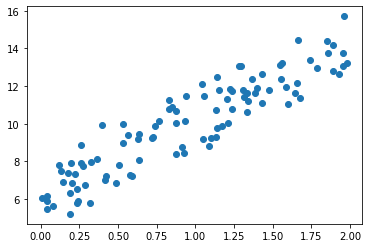

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y=4X + 6 근사 (w1=4, w0=6) 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
#비용 함수
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

In [3]:
#w1과 w0를 업데이트할 w1_update, w0_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)

  #먼저 w1_update, w0_update 를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  #w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [5]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y, iters=10000):
  #w0와 w1을 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1,w0  

In [7]:
#최종적으로 예측값과 실제값의 RSS 차이 계산
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost : 0.9935


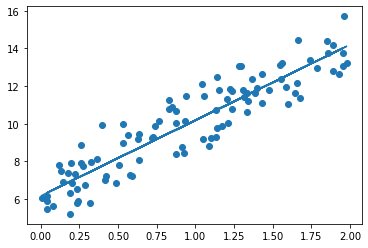

In [8]:
plt.scatter(X,y)
plt.plot(X, y_pred)

- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점 있음
- 실전에서는 확률적 경사 하강법 이용 - 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도 보장

In [9]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)

    #전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1 : ', round(w1[0,0],3), 'w0 : ', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 :  4.028 w0 :  6.156
Gradient Descent Total Cost : 0.9937


- 피처가 M개 있다면 그에 따른 회귀 계수 M+1개로 도출됨


##**다항회귀와 과(대)적합/과소적합 이해**
###**다항 회귀 이해**
- 회귀가 독립변수의 단항식이 아닌 2차,3차 방정식과 같은 다항식으로 표현되는 것, 선형 회귀임 - 회귀에서 선형/비선형을 나누는 기준은 화귀 계수가 선형인지 비선형인지
- 사이킷런은 다항 회귀를 위한 클래스 명시적으로 제공하지 않지만 다항회귀 역시 선형회귀이기 때문에 비선형 함수를 선형 모델에 적용 시키는 방법으로 구현
- PolynomialFeatures 클래스를 통해 피처를 Polynomial 피처로 변환
  - degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

In [11]:
# x1, x2를 1, x1, x2, x1^2, x1x2 x2^2 으로 변환

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 게수 피처:\n', X)

#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 게수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [13]:
def polynomial_func(X):
  y = 1+2*X[:,0] + 3*X[:,0]**2+ 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 :\n',y)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값 :
 [  5 125]


In [15]:
#일차 단항식 계수를 삼차 다항식 계수로 변환하고 선형회귀에 적용하면 다항 회귀로 구현됨
#3차 다항식 변환

from sklearn.linear_model import LinearRegression

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ,', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : , (10,)


- 일차 단항식 피처 개수는 2개였지만 변환 이후에는 10개로 늘어남

In [16]:
#피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다는 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 코드를 더 명료하게 작성하는 방법
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+2*X[:,0] + 3*X[:,0]**2+ 4*X[:,1]**3
  return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


###**다항 회귀를 이요한 과소적합 및 과적합 이해**
- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있음, 다항식의 차수가 높아질수록 매우 복잡한 피처간의 관계까지 모델링이 가능 - 하지만 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어짐

In [17]:
#원래 데이터 세트는 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만들어줌
#이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교


import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값 반환
def true_fun(X):
  return np.cos(1.5* np.pi * X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y같은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32 입니다.


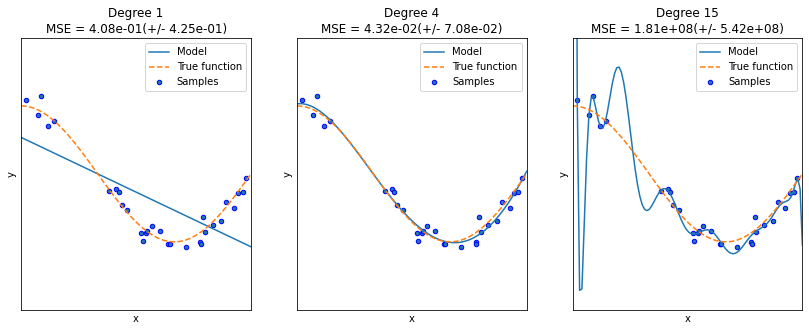

In [18]:
#다항식 차수를 각 1, 14, 15로 변경하면서 예측 결과 비교
#다항식 차수별로 학습 수행한 뒤 cross_val_score()로 MSE값을 구해 차수별 예측 성능 평가

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다. >
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()


- 실선으로 표현된 예측 곡선은 다항 회귀 예측 곡선, 점선으로 표현된 곡선은 실제 데이터 세트 X,Y의 코사인 곡선
- 맨 왼쪽 : 단순 선형 회귀와 똑같음, 과소적합, MSE 0.41
- 가운데 : 실제 데이터 세트와 유사, 가장 잘 예측, MSE 0.04 가장 뛰어난 예측 성능
- 맨 오른쪽 : MSE 가 180526263가 될 정도 어처구니 없는 오류, 학습 데이터 세트만 정확히 예측하고 테스트 값의 실제 곡선과는 완전히 다른 형태, 과적합

###**편향 분산 트레이드오프**
- 머신러닝이 극복해야할 가장 중요한 이슈
- 위의 degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향서응로 치우친 경향이 있음 - 고편향성
- degree 15와 같은 모델은 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 됨 - 고분산성
- 일반적으로 편향과 분산은 한쪽이 높으면 한 쪽이 높아지는 경향이 있음 - 편향이 높으면 분산이 낮아짐(과소적합) 반대로 분산이 높으면 편향이 낮아짐(과적합)
- 편향이 너무 높으면 전체 오류가 높음, 편향을 점점 나주면 동시에 분산이 높아지고 전체 오류도 낮아짐, 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 골디락스 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류값이 증가하면서 예측 성능이 다시 저하됨